# Biotuner sanity checks

This notebook illustrates the use of the *biotuner* toolbox with the aims to:
1. Showing that we can retrieve harmonic information from a signal that we have generated
2. Comparing harmonic structures from biological signals and noise signals
3. Comparing harmonic structures from biological signals and surrogated data

This notebook is one step towards the exploration of biological harmonies and their relevance for the carving of new musical systems, as compared to pseudo-random generative engines.

### Imports

In [ ]:
import numpy as np
import math
from fractions import Fraction
import itertools
import biotuner
from biotuner.biotuner_utils import *
from biotuner.biotuner_functions import *
from biotuner.biotuner_object import *
from biotuner.biotuner2d import *
import matplotlib.pyplot as plt
from numpy import array, zeros, ones, arange, log2, sqrt, diff, concatenate
import os
import time
import mne

## Retrieving frequency information from simulated signals using the biotuner

First, we need to generate a signal composed of a set of predetermined frequencies

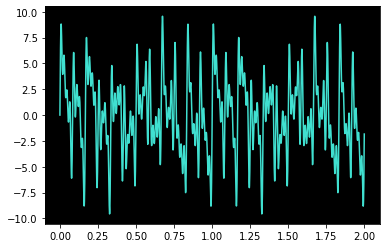

In [2]:
sf = 1000
length =2
theta = 0
freqs = [2, 6, 11, 12, 18, 24, 36, 48]
amps = [1, 2, 2, 2, 1, 2, 2, 2, 2]
    
signal = generate_signal(sf, length, freqs, amps, show=True, color = 'turquoise')

Then, we want to retrieve the generator frequencies using different peaks_functions offered by the *biotuner*.

First, we will use the **'harmonic_peaks'** method, which select the spectral peaks that have higher number of other peaks as harmonics. 

In [3]:
biotuning = biotuner(sf = sf, peaks_function = 'harmonic_peaks', precision = 0.5) # Initialize biotuner object

biotuning.peaks_extraction(signal, min_freq = 1, max_freq = 100, min_harms = 2, harm_limit = 1000)

biotuning.peaks

C:\Users\Dell\Anaconda3\lib\site-packages\biotuner\biotuner_functions.py:1334: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  harmonics = np.array(harmonics)
C:\Users\Dell\Anaconda3\lib\site-packages\biotuner\biotuner_functions.py:1337: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  harmonic_peaks = np.array(harmonic_peaks)


array([ 6., 11., 18., 24., 36., 48.])

We will do the same thing with the **'FOOOF'** method

In [4]:
biotuning = biotuner(sf = sf, peaks_function = 'FOOOF', precision = 0.5) # Initialize biotuner object

biotuning.peaks_extraction(signal, min_freq = 1, max_freq = 100)

biotuning.peaks

array([ 2.  ,  6.  , 10.87, 12.14, 18.  , 24.  , 36.  ])

And now with the **'fixed'** bands method. With the specified bands, we would expect to find *2, 6* and *24Hz*

In [5]:
FREQ_BANDS = [[1, 3], [4, 7], [20, 30]]
biotuning = biotuner(sf = sf, peaks_function = 'fixed', precision = 0.5) # Initialize biotuner object

biotuning.peaks_extraction(signal, FREQ_BANDS = FREQ_BANDS)

biotuning.peaks

array([ 2.,  6., 24.])

Finally using the Empirical Mode Decomposition (**'EMD'**) algorithm

In [6]:
FREQ_BANDS = [[1, 3], [4, 7], [20, 30]]
biotuning = biotuner(sf = sf, peaks_function = 'EMD', precision = 0.5) # Initialize biotuner object

biotuning.peaks_extraction(signal)

biotuning.peaks

array([ 0.5,  2. ,  4. , 11. , 24. ])

## Comparing EEG data with noise and surrogate data 

One question that rises when using the Biotuner is whether the harmonic information that is retrieved on biological signals is different than if we were using comparable non-biological signals, such as noises and surrogated data

<img src="images/noise_color.png" width=500 height=500 />

The ***graph_surrogates*** function allows to compare the distribution of harmonicity metrics for EEG, surrogates and noise data. 

**------------------------- TYPES OF SIMULATED SIGNALS -----------------------------------------**

**NOISES**

**brown noise** : noise with a slope of 1/f^2

**pink noise** : noise with a slope of 1/f^1

**white noise** : noise with a slope of 1/f^0

**blue noise** : noise with a slope of 1/f^-1

**SURROGATES**

**shuffle** : the time series is randomly shuffled and filtered as the original time series

**phase** : the phase information of the signal is shuffled

**AAFT** : noise with a slope of 1/f^1

**TFT** : truncated-fourier-transform; randominzing the frequencies phases above a certain threshold (Nakamura, Small and Hirata, 2006)


**------------------------- HARMONIC METRICS -----------------------------------------**

*Peaks metrics* that can be used: **'tenney', 'harmsim', 'euler', 'cons', 'harm_fit'**

*Scale metrics* that can be used (using the scale from *peaks ratios*): **'sum_p_q', 'sum_distinct_intervals', 'sum_q_for_all_intervals', 'matrix_harm_sim', 'matrix_cons'**

*Scale metrics* that can be used (using the scale from *dissonance curve*): **'dissonance', 'diss_n_steps', 'diss_harm_sim'**

## Using Sleep data
#### Load the 'sleep_data.npy' file from the eeg_data folder. These data are from : https://www.physionet.org/content/sleep-edfx/1.0.0/

In [38]:
sleep_data = np.load('eeg/sleep_data_Cz.npy', allow_pickle = True)
sleep_conditions = ['wake', 'stage1', 'stage2', 'stage3', 'stage4', 'REM']

### Comparing EEG signal to colored noises

EEG signal during wakefulness is compared with ***brown, pink, white*** and ***blue noise*** simulated signals using ***'fixed', 'adapt'*** and ***'EEMD'*** peaks_functions

fixed  peaks freqs  [13.542105263157895, 12.479425837320573, 15.328708133971292, 18.25215311004785, 11.706698564593301]


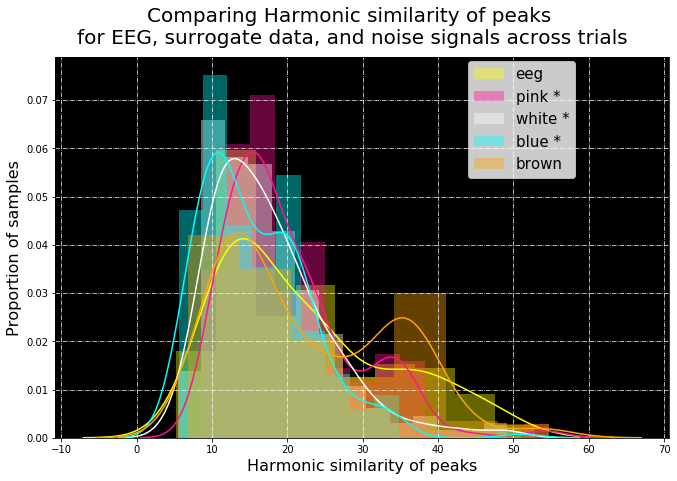

adapt  peaks freqs  [11.213397129186603, 11.275598086124399, 14.101913875598086, 16.90622009569378, 9.782775119617225]


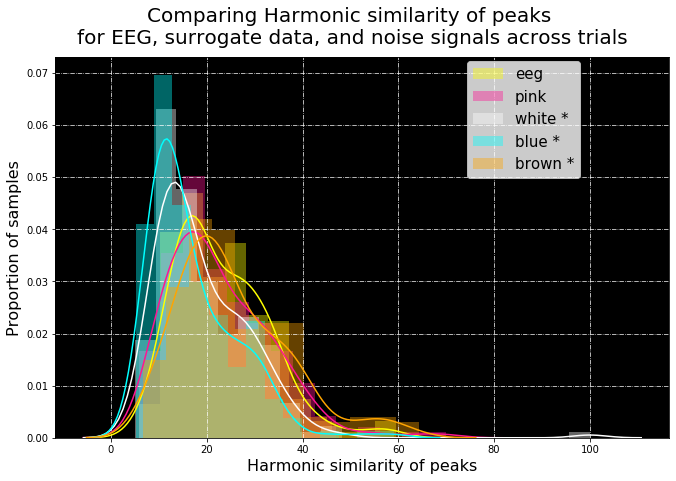

EEMD  peaks freqs  [3.8382775119617225, 4.607177033492824, 5.8220095693779905, 6.767464114832537, 3.4100478468899524]


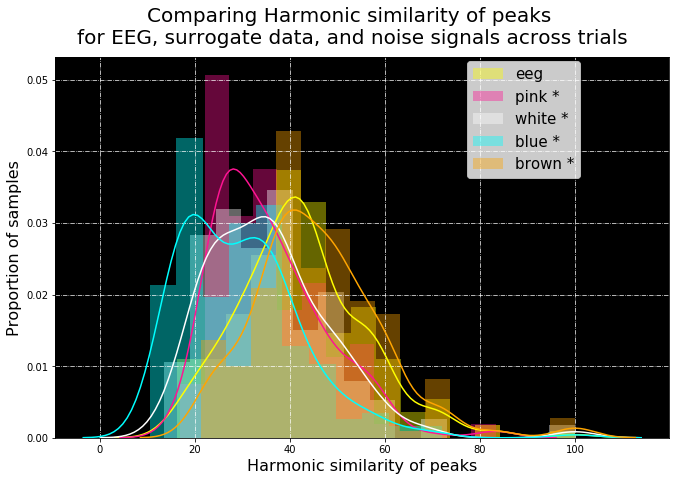

In [40]:
peaks_functions = ['fixed', 'adapt', 'EEMD']
sf = 100
for p in peaks_functions:  
    colors = ['yellow', 'deeppink', 'white', 'cyan', 'orange']
    conditions = ['eeg', 'pink', 'white', 'blue', 'brown']
    metric_to_graph = 'harmsim'
    data = np.array(sleep_data[0], dtype='float64')
    graph_surrogates(data, sf, conditions, metric_to_graph = metric_to_graph, peaks_function = p, precision = 0.5, 
                     savefolder = None, low_cut = 1, high_cut = (sf/2)-0.1, 
                    display = True, save = False, colors = colors)

### Comparing EEG signal to surrogated data

EEG signal during wakefulness is compared with ***surrogated data*** using ***'EMD'*** and ***'EEMD'*** peaks_functions

EMD  peaks freqs  [2.1857416267942584, 3.792822966507177, 2.1355023923444976, 2.3309090909090906, 2.347751196172249]


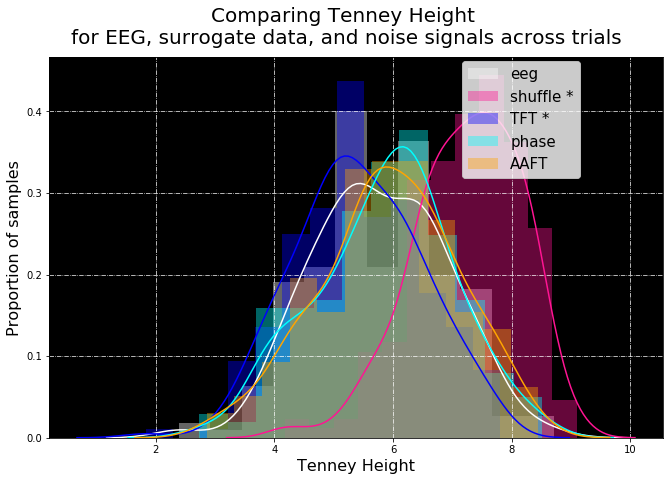

In [ ]:
peaks_functions = ['EMD']
metrics = ['tenney', 'harmsim', 'sum_q_for_all_intervals']
sf = 100
for metric in metrics:
    for p in peaks_functions:  
        colors = ['white', 'deeppink', 'blue', 'cyan', 'orange'] 
        conditions = ['eeg', 'shuffle', 'TFT', 'phase', 'AAFT']
        data = np.array(sleep_data[0], dtype='float64')
        graph_surrogates(data, sf, conditions, metric_to_graph = metric, peaks_function = p, precision = 0.1, 
                         savefolder = None, low_cut = 1, high_cut = (sf/2)-0.1, 
                        display = True, save = False, colors = colors)

You can easily save graphs for series of ***peaks functions*** and ***metrics***. 

In [ ]:
savefolder = 'C:/Users/Dell/GitHub/biotuner_dev/dev/graphs/' #Choose your folder the save the images
peaks_functions = ['EEMD', 'fixed']
metrics = ['harmsim', 'matrix_harm_sim']
sf = 100
for p in peaks_functions:
    for metric in metrics:
        data_type = ['eeg', 'pink', 'white', 'phase']
        metric_to_graph = metric
        data = np.array(sleep_data[2], dtype='float64')
        graph_surrogates(data, sf, data_type, metric_to_graph, p, 0.5, savefolder, str(condition), low_cut = 1, high_cut = (sf/2)-0.1)

## Using pareidolia data

Peaks metrics that can be used: **'tenney', 'harmsim', 'euler', 'cons', 'harm_fit'**

Scale metrics that can be used (using the scale from peaks ratios): **'sum_p_q', 'sum_distinct_intervals', 'sum_q_for_all_intervals', 'matrix_harm_sim', 'matrix_cons'**

Scale metrics that can be used (using the scale from dissonance curve): **'dissonance', 'diss_n_steps', 'diss_harm_sim'**

### Comparing EEG signal to colored noises

EEG signal is compared with ***brown, pink, white*** and ***blue noise*** simulated signals using ***'harmonic_peaks'*** and ***'EEMD'*** peaks_function

harmonic_peaks  peaks freqs  [10.278530219780219, 10.05915750915751, 19.49459706959707, 28.59478021978022, 8.198489010989011]


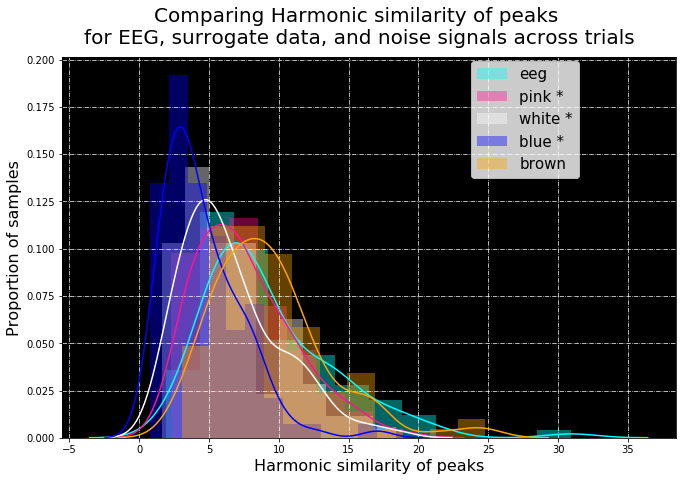

harmonic_peaks  peaks freqs  [10.278530219780219, 9.438324175824176, 18.2860347985348, 28.550137362637358, 8.256730769230769]


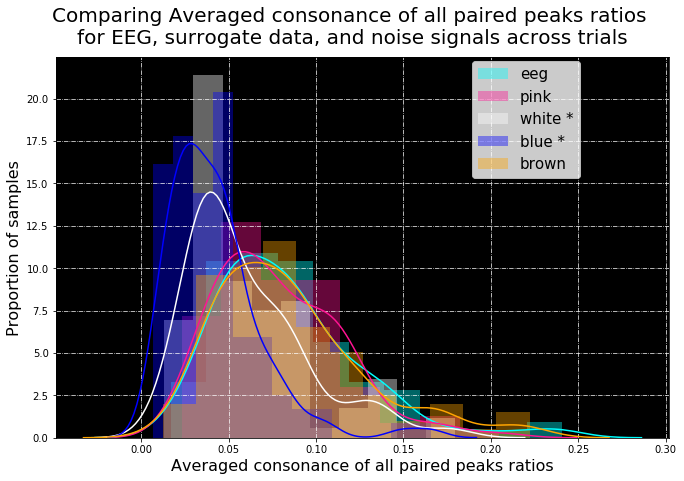

harmonic_peaks  peaks freqs  [10.278530219780219, 9.535989010989011, 19.4385989010989, 28.111181318681318, 8.598214285714285]


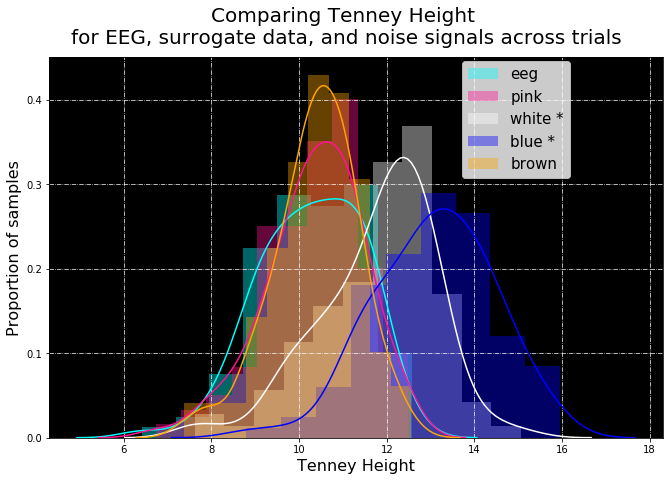

EEMD  peaks freqs  [11.323269230769231, 16.810384615384617, 21.93653846153846, 26.75788461538462, 11.724615384615383]


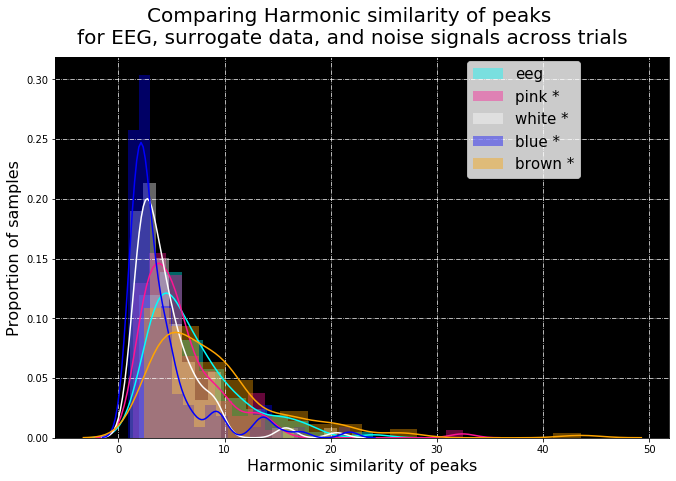

EEMD  peaks freqs  [11.323269230769231, 17.208076923076923, 22.305384615384614, 27.075576923076923, 11.855192307692308]


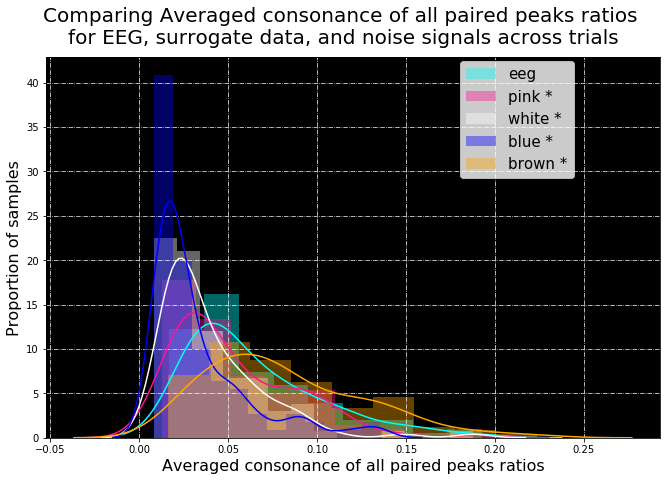

EEMD  peaks freqs  [11.323269230769231, 17.224230769230772, 22.49557692307692, 27.059807692307693, 11.329615384615384]


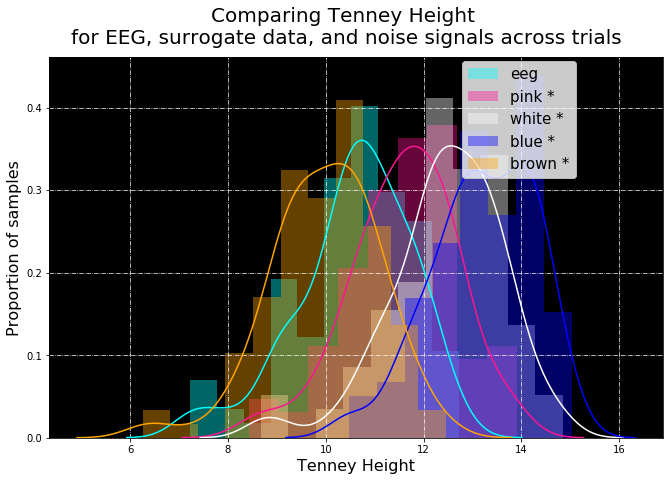

In [43]:
channels= ['O2']
peaks_functions = ['harmonic_peaks', 'EEMD']
metrics = ['harmsim', 'cons', 'tenney']
sf = 1000
colors = ['cyan', 'deeppink', 'white', 'blue', 'orange', 'yellow'] 
for p in peaks_functions:
    for channel in channels: 
        for metric in metrics:
            #conditions = ['eeg', 'pink', 'white', 'AAFT', 'phase', 'TFT']
            conditions = ['eeg', 'pink', 'white', 'blue', 'brown']
            metric_to_graph = metric
            data = np.load('eeg/pareidolia_data_'+channel+'.npy')
            graph_surrogates(data, sf = sf, conditions = conditions, metric_to_graph=metric_to_graph, 
                             peaks_function = p, precision = 0.1, savefolder = '_', tag = channel, 
                             low_cut = 0.5, high_cut = 150, colors = colors, save = False, display = True,
                            n_harmonic_peaks = 7)

### Comparing EEG signal to surrogated data

EEG signal is compared with ***surrogated data*** using ***'EMD'*** and ***'EEMD'*** peaks_functions

EMD  peaks freqs  [7.532692307692307, 8.068269230769232, 7.505, 7.966153846153846, 14.989807692307693]


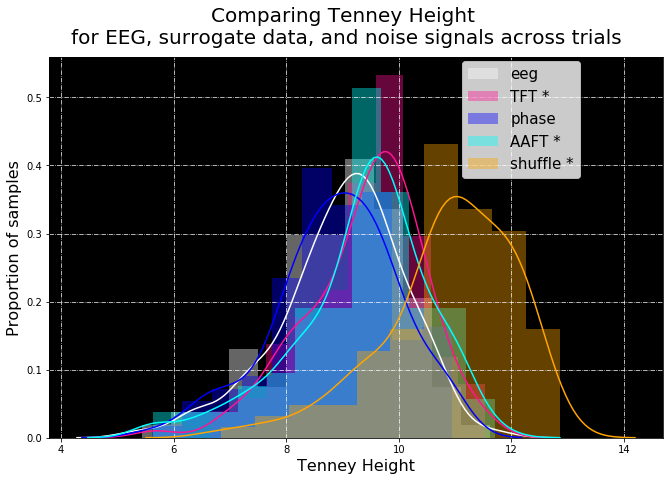

EMD  peaks freqs  [7.532692307692307, 8.068269230769232, 7.590769230769231, 7.624615384615385, 14.848653846153848]


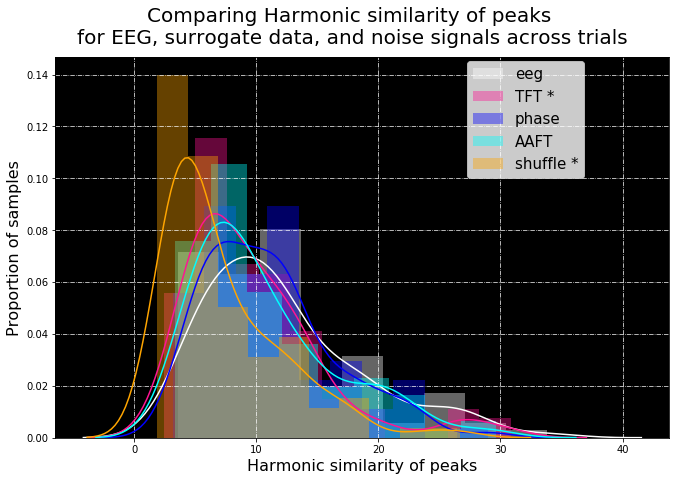

EMD  peaks freqs  [7.532692307692307, 8.068269230769232, 7.720961538461538, 7.719038461538461, 15.226346153846153]


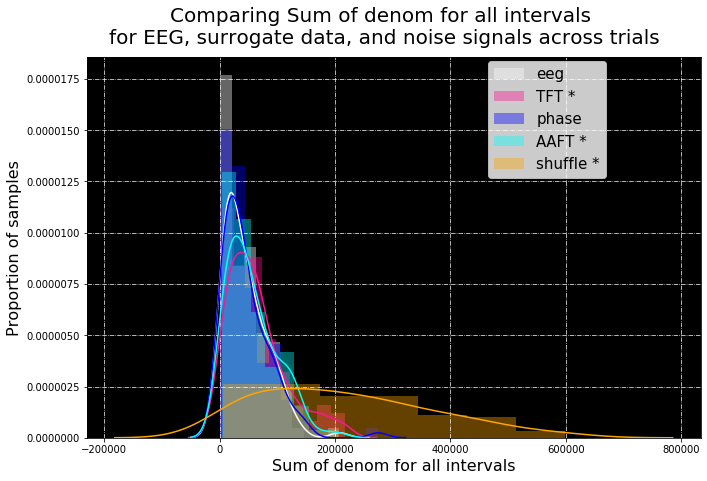

EMD  peaks freqs  [7.532692307692307, 8.068269230769232, 7.519615384615384, 7.6315384615384625, 15.074038461538464]


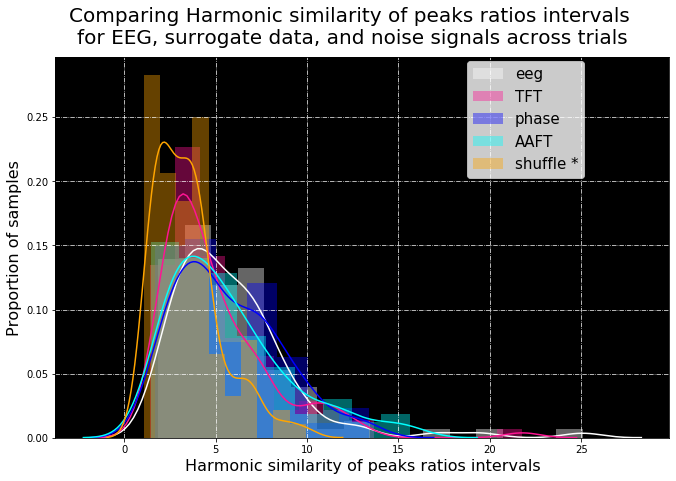

In [50]:
channels= ['O1']
savefolder = 'C:/Users/Dell/GitHub/biotuner_dev/dev/graphs/pareidolia/' #Choose your folder the save the images
peaks_functions = ['EMD']
metrics = ['tenney', 'harmsim', 'sum_q_for_all_intervals', 'matrix_harm_sim']
sf = 1000
colors = ['white', 'deeppink', 'blue', 'cyan', 'orange'] 
for p in peaks_functions:
    for channel in channels: 
        for metric in metrics:
            #conditions = ['eeg', 'pink', 'white', 'AAFT', 'phase', 'TFT']
            conditions = ['eeg', 'TFT', 'phase', 'AAFT', 'shuffle']
            metric_to_graph = metric
            data = np.load('eeg/pareidolia_data_'+channel+'.npy')
            graph_surrogates(data, sf = sf, conditions = conditions, metric_to_graph=metric, 
                             peaks_function = p, precision = 0.1, savefolder = savefolder, tag = channel, 
                             low_cut = 0.5, high_cut = 150, colors = colors, save = False, display = True)

#### Compute for many channels, peaks_functions and metrics, and save images to folder

In [ ]:
channels= ['O1','O2','T7','T8', 'C3','C4']
savefolder = 'C:/Users/Dell/GitHub/biotuner_dev/dev/graphs/pareidolia/' #Choose your folder the save the images
peaks_functions = ['adapt', 'EMD', 'EEMD']
metrics = ['matrix_harm_sim', 'matrix_cons', 'harmsim', 'tenney']
sf = 1000
colors = ['white', 'deeppink', 'blue', 'cyan', 'orange'] 
for p in peaks_functions:
    for channel in channels: 
        for metric in metrics:
            #conditions = ['eeg', 'pink', 'white', 'AAFT', 'phase', 'TFT']
            conditions = ['eeg', 'TFT', 'phase', 'AAFT', 'shuffle']
            metric_to_graph = metric
            data = np.load('eeg_data/pareidolia_data_'+channel+'.npy')
            graph_surrogates(data, sf = sf, conditions = conditions, metric_to_graph=metric, 
                             peaks_function = p, precision = 0.5, savefolder = savefolder, tag = channel, 
                             low_cut = 0.5, high_cut = 150, colors = colors, save = True, display = False)

## Using muse headband dataset

<img src="images/muse_sensors.png" width=300 height=300 />

In [33]:
import pandas
df = pandas.read_csv('eeg/muse_test2.csv')
raw_TP9 = np.array(df['RAW_TP9'])
raw_TP9 = raw_TP9[~np.isnan(raw_TP9)]
raw_AF7= np.array(df['RAW_AF7'])
raw_AF7 = raw_AF7[~np.isnan(raw_AF7)]
raw_AF8 = np.array(df['RAW_AF8'])
raw_AF8 = raw_AF8[~np.isnan(raw_AF8)]
raw_TP10 = np.array(df['RAW_TP10'])
raw_TP10 = raw_TP10[~np.isnan(raw_TP10)]

EEG signal is compared with ***brown, pink, white*** and ***blue noise*** simulated signals using ***'adapt'*** peaks_function

adapt  peaks freqs  [12.50036496350365, 13.083941605839415, 14.077737226277373, 15.5021897810219, 12.243065693430658]


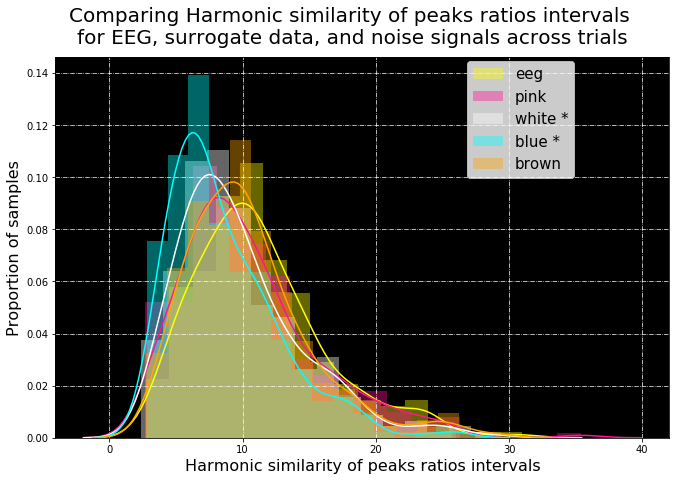

adapt  peaks freqs  [12.074817518248175, 13.251094890510949, 14.137591240875913, 15.395985401459853, 12.163868613138687]


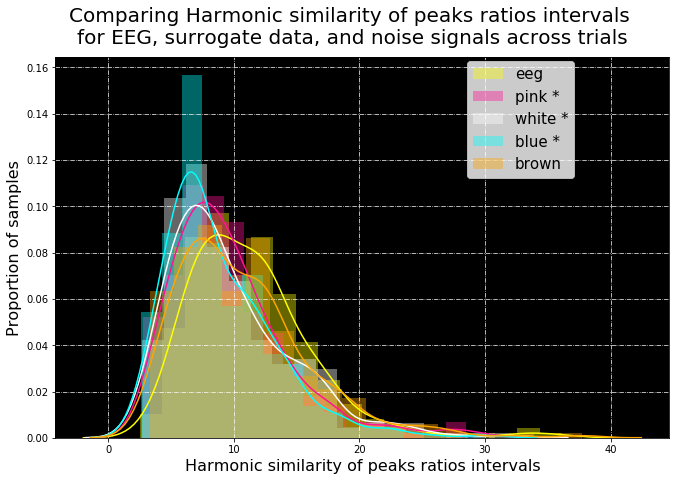

adapt  peaks freqs  [11.340875912408759, 13.144525547445255, 14.614963503649635, 15.545620437956204, 12.063138686131387]


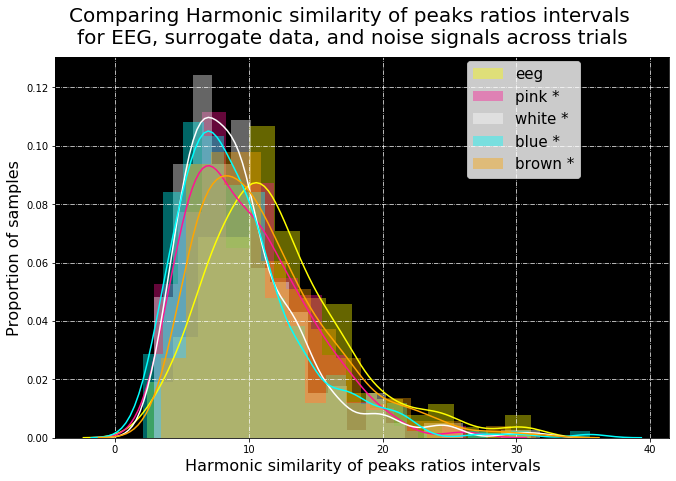

adapt  peaks freqs  [11.164963503649634, 13.336131386861314, 14.448175182481753, 15.582116788321168, 12.296350364963505]


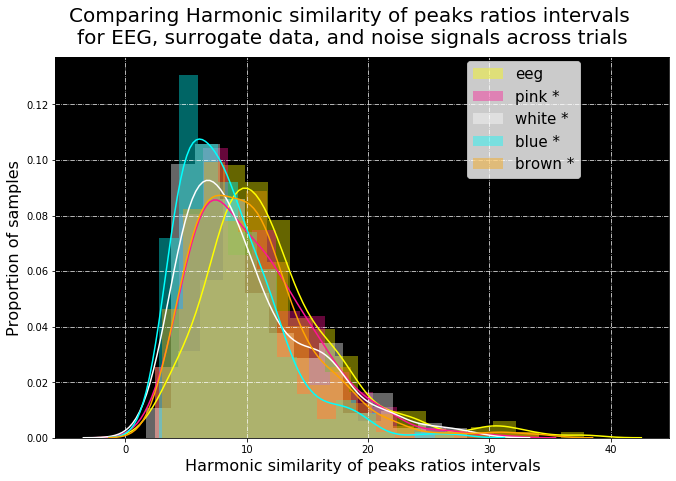

In [35]:
sf = 220
channels = [raw_AF7, raw_AF8, raw_TP9, raw_TP10]
for ch in channels:

    data = ch
    window = 2

    window_len = int(window*sf)
    n_windows = int(len(data)/window_len)

    data_sliced = []
    for i in range(n_windows):
        start_idx = i*window_len
        stop_idx = start_idx + window_len
        data_sliced.append(data[start_idx:stop_idx])


    peaks_functions = ['adapt']
    for p in peaks_functions:  
        colors = ['yellow', 'deeppink', 'white', 'cyan', 'orange']
        conditions = ['eeg', 'pink', 'white', 'blue', 'brown']
        metric_to_graph = 'matrix_harm_sim'
        data = np.array(data_sliced, dtype='float64')
        graph_surrogates(data, sf, conditions, metric_to_graph = metric_to_graph, peaks_function = p, precision = 0.5, 
                         savefolder = None, low_cut = 2, high_cut = (sf/2)-0.1, 
                        display = True, save = False, colors = colors, n_harmonic_peaks = 5)

adapt  peaks freqs  [12.50036496350365, 12.60036496350365, 12.357664233576642, 12.068978102189782, 13.855839416058394]


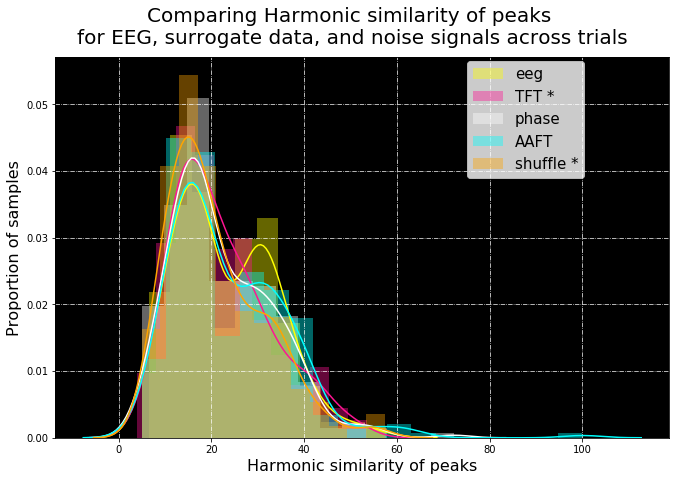

adapt  peaks freqs  [12.074817518248175, 12.136861313868613, 12.191605839416058, 12.018248175182482, 14.277372262773723]


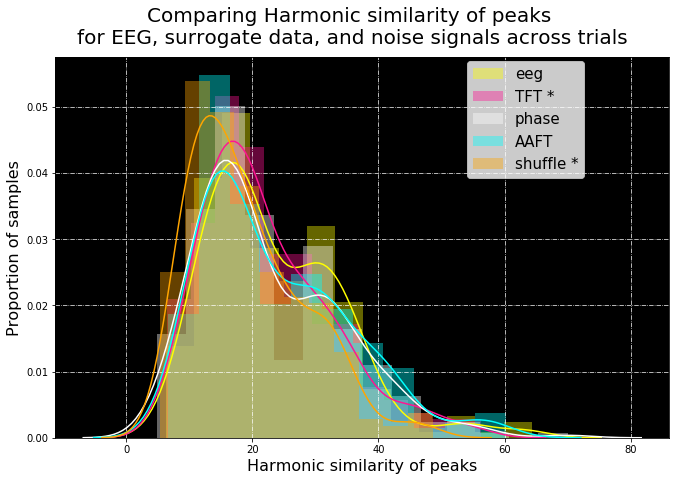

adapt  peaks freqs  [11.340875912408759, 11.400729927007298, 11.62080291970803, 11.91058394160584, 14.318613138686132]


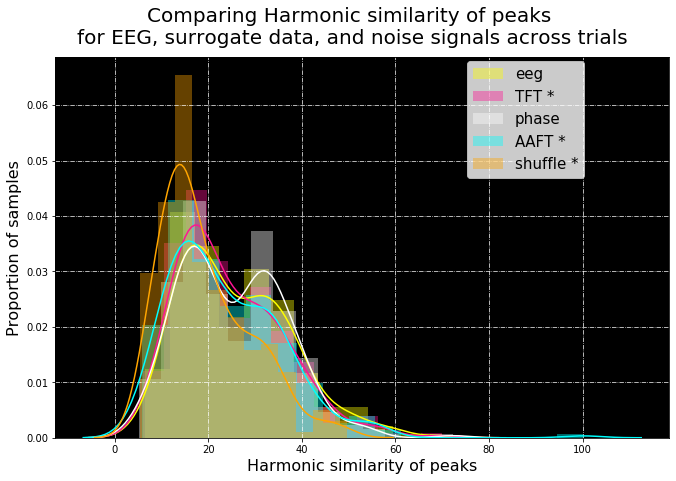

adapt  peaks freqs  [11.164963503649634, 11.238686131386862, 11.37153284671533, 11.583941605839415, 14.195620437956206]


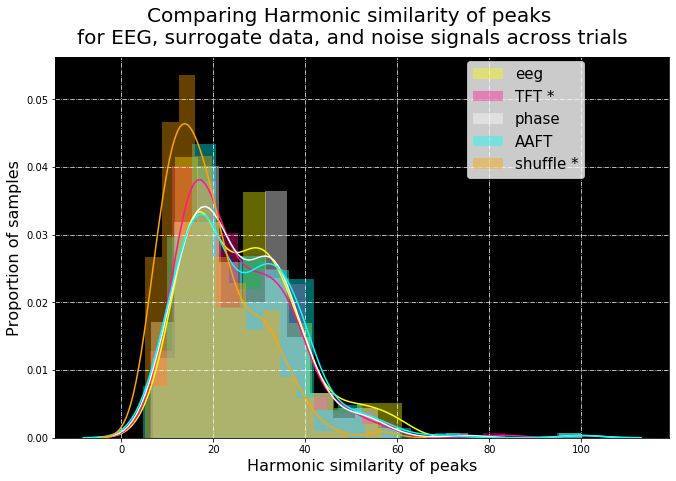

In [37]:
sf = 220
channels = [raw_AF7, raw_AF8, raw_TP9, raw_TP10]
for ch in channels:

    data = ch
    window = 2

    window_len = int(window*sf)
    n_windows = int(len(data)/window_len)

    data_sliced = []
    for i in range(n_windows):
        start_idx = i*window_len
        stop_idx = start_idx + window_len
        data_sliced.append(data[start_idx:stop_idx])


    peaks_functions = ['adapt']
    for p in peaks_functions:  
        colors = ['yellow', 'deeppink', 'white', 'cyan', 'orange']
        conditions = ['eeg', 'TFT', 'phase', 'AAFT', 'shuffle']
        metric_to_graph = 'harmsim'
        data = np.array(data_sliced, dtype='float64')
        graph_surrogates(data, sf, conditions, metric_to_graph = metric_to_graph, peaks_function = p, precision = 0.5, 
                         savefolder = None, low_cut = 2, high_cut = (sf/2)-0.1, 
                        display = True, save = False, colors = colors)
